# Convex functions

## Lines and line segments

Points $y$ on a **line** through two points $x_1 \neq x_2$ in $\mathbb{R}^{n}$
can be expressed by

$$
y = \theta x_1 + (1 - \theta) x_2,
$$

or

$$
y = x_2 + \theta (x_1 - x_2),
$$

where $\theta \in \mathbb{R}$.

For a **line segment**, $\theta$ is limited to $0 \leq \theta \leq 1$.

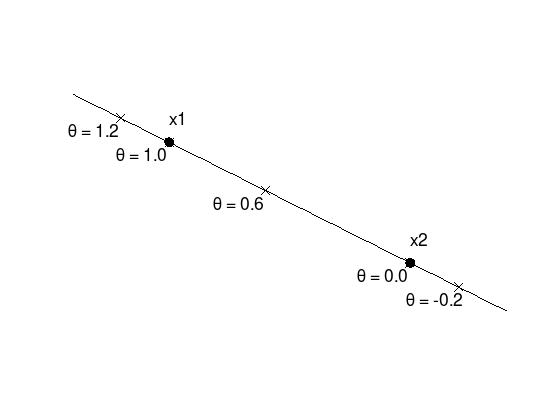

In [1]:
x1 = [0.0; 0.5];
x2 = [1.0; 0.0];
theta = linspace (-0.4, 1.4, 100);
y = @(t) x2 + t .* (x1 - x2);
yy = y(theta);
plot (yy(1,:), yy(2,:), 'k');
hold on;
tprops = {'FontSize', 18};
mprops = {'MarkerSize', 9, ...
          'MarkerFaceColor', 'black'};
for t = [1.2, 1, 0.6, 0, -0.2]
  yy = y(t);
  plot (yy(1), yy(2), 'kx', mprops{:});
  text (yy(1) - 0.22, yy(2) - 0.05, ...
        sprintf ('\\theta = %.1f', t), tprops{:});
end
plot (x1(1), x1(2), 'ko', mprops{:});
text (x1(1), x1(2) + 0.1, 'x1', tprops{:});
plot (x2(1), x2(2), 'ko', mprops{:});
text (x2(1), x2(2) + 0.1, 'x2', tprops{:});
axis equal;
axis off;

## Affine sets

An **affine set** contains the **line** through any two distinct points in the set.

For example the solution set of linear equations $\{x | Ax = b\}$ is affine.

Conversely, every affine set can be expressed as solution set of a system of linear equations.

## Convex sets

A **convex set** $C$ contains the **line segment** through any two distinct points in the set.

$$
x_1, x_2 \in C, \quad 0 \leq \theta \leq 1 \quad\implies\quad \theta x_1 + (1 - \theta) x_2 \in C.
$$

**Examples** (from {cite}`Boyd2004` (p. 24): first set is convex, the latter two not)

![convex_sets](res/convex_sets.png)

## Hyperplanes

Affine and convex sets of the form
$\{ x \in \mathbb{R}^{n} \colon  a^{T}x = b \}$ with normal vector $a \neq 0$.

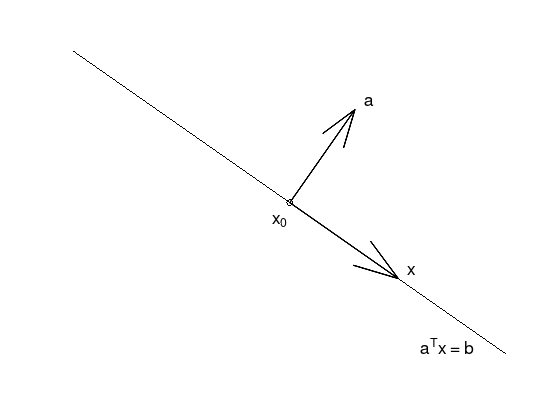

In [2]:
x1 = [0, 0.7];
x2 = [1, 0.0];
x0 = x1 + 0.5 .* (x2 - x1);
x = 0.25 .* (x2 - x1);
a = [0.15, 0.15 / x1(2)];
plot ([x1(1), x2(1)], [x1(2), x2(2)], 'k-');
hold on;
plot (x0(1), x0(2), 'ko');
quiver (x0(1), x0(2), a(1), a(2), 'k', 'LineWidth', 2);
quiver (x0(1), x0(2), x(1), x(2), 'k', 'LineWidth', 2);
tprops = {'FontSize', 18};
text (x0(1) - 0.04, x0(2) - 0.04, 'x_0', tprops{:});
text (x0(1) + a(1) + 0.02, x0(2) + a(2) + 0.02, 'a', tprops{:});
text (x0(1) + x(1) + 0.02, x0(2) + x(2) + 0.02, 'x', tprops{:});
text (x2(1) - 0.2, x2(2) + 0.02, 'a^{T}x = b', tprops{:});
axis equal;
axis off;

## Halfspaces

Convex sets of the form $\{ x \in \mathbb{R}^{n} \colon a^{T}x \leq b \}$
with normal vector $a \neq 0$.

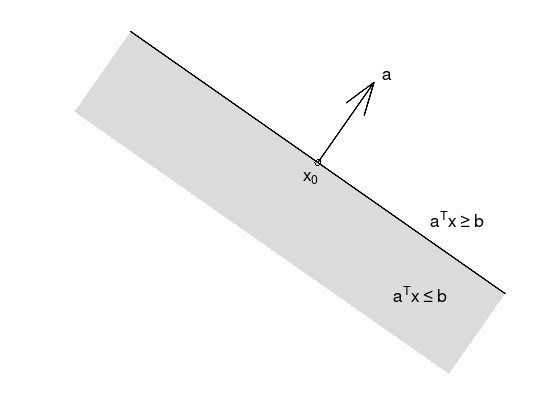

In [3]:
x1 = [0, 0.7];
x2 = [1, 0.0];
x0 = x1 + 0.5 .* (x2 - x1);
a = [0.15, 0.15 / x1(2)];
x3 = x1 - a;
x4 = x2 - a;
fill ([x1(1), x2(1), x4(1), x3(1)], [x1(2), x2(2), x4(2), x3(2)], ...
      [220, 220, 220] / 256, 'EdgeColor', 'none');
hold on;
plot ([x1(1), x2(1)], [x1(2), x2(2)], 'k-', 'LineWidth', 2);
plot (x0(1), x0(2), 'ko');
quiver (x0(1), x0(2), a(1), a(2), 'k', 'LineWidth', 2);
tprops = {'FontSize', 18};
text (x0(1) - 0.04, x0(2) - 0.04, 'x_0', tprops{:});
text (x0(1) + a(1) + 0.02, x0(2) + a(2) + 0.02, 'a', tprops{:});
text (x2(1) - 0.2, x2(2) + 0.2, 'a^{T}x \geq b', tprops{:});
text (x2(1) - 0.3, x2(2),       'a^{T}x \leq b', tprops{:});
axis equal;
axis off;

## Ellipsoid

Convex sets of the form

$$
\{ x \in \mathbb{R}^{n} \colon (x - x_{c})^{T} P^{-1} (x - x_{c}) \leq 1 \},
$$

with center $x_{c} \in \mathbb{R}^{n}$ and $P \succ 0$ (symmetric positive definite) or

$$
\{ x_{c} + Au \in \mathbb{R}^{n} \colon \lVert u \rVert \leq 1 \},
$$

with $A$ square and non-singular.

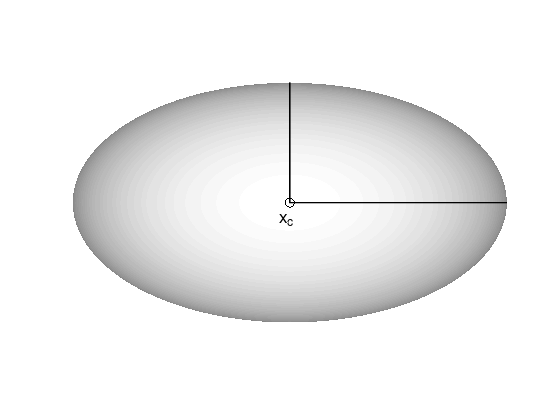

In [4]:
rx = 2;
ry = 0.7;
rz = 1;
[x, y, z] = ellipsoid (0, 0, 0, rx, ry, rz, 200);
colormap ('gray');
surf (x, y, z);
hold on;
plot3 ([0, rx], [0, 0], [1, 1], 'k-', 'LineWidth', 2);
plot3 ([0, 0], [0, ry], [1, 1], 'k-', 'LineWidth', 2);
plot3 (0, 0, 1, 'ko', 'MarkerSize', 9);
text  (-0.1, -0.1, 1, 'x_{c}', 'FontSize', 18);
shading flat;
view (0, 90);  % reduce to x-y-plane
xlim ([-rx, rx]);
ylim ([-1, 1]);
zlim ([-rz, rz]);
axis off;